<a href="https://colab.research.google.com/github/ramadhanbay/kuliah/blob/main/UTS_SinarBayuRamadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS Machine Learning**

Sinar Bayu Ramadhan (01679220015@student.uph.edu)

Contoh kasus menggunakan google collab untuk Random Forest menggunakan data mobil bekas yang diambil dari https://atapdata.ai/dataset/231/harga_mobil_bekas

## import data untuk train

In [2]:
%pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest
import category_encoders as ce
import matplotlib.pyplot as plt


url_train = 'https://raw.githubusercontent.com/ramadhanbay/kuliah/main/dataset/cars_train_new.csv'
data_train = pd.read_csv(url_train, low_memory=False)
data_train.head(3)

,id,title,band,model,variant,fuelType,bodytype,tramsmission,seating,year,milage,color,image,place,price
0,50318,2010 Nissan X-Trail 2.0 T31 SUV,Nissan,X-Trail,T31,Pertamax,SUV,Manual,5,2010,250,Silver,https://img4.icarcdn.com/2200806/thumb-l_used-...,Wonogiri,115000000
1,19882,2012 Mazda 2 1.5 S Sedan,Mazda,2,S,Pertamax,Sedan,Manual,5,2012,67500,Hijau,https://img2.icarcdn.com/8715916/thumb-l_used-...,Surabaya,105000000
2,29381,2014 Honda Odyssey 2.4 Prestige 2.4 MPV,Honda,Odyssey,Prestige 2.4,Pertamax,MPV,Automatic,6,2014,64000,Hitam,https://img3.icarcdn.com/6198256/thumb-l_used-...,Jakarta Selatan,355000000


In [4]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
data_train = data_train.drop(['id','title','image'], axis=1)
print('The shape of our features is:', data_train.shape)


The shape of our features is: (80000, 12)


In [5]:
data_train.isnull().sum()

band               0
model              0
variant         1898
fuelType           1
bodytype         170
tramsmission       0
seating            0
year               0
milage             0
color              0
place              0
price              0
dtype: int64

In [47]:
nan_values = data_train[data_train['fuelType'].isna()]

print (nan_values)

       band    model variant fuelType   bodytype tramsmission seating  year  \
8163  Tesla  Model S   P100D      NaN  Hatchback    Automatic       5  2016   

      milage  color          place       price  
8163    7500  Putih  Jakarta Utara  4400000000  


In [7]:
# fuel type
data_train["fuelType"] = data_train["fuelType"].fillna("baterai")

In [16]:
# variant & bodytype
#data_train = data_train.drop(['variant','bodytype'], axis=1)
data_train = data_train.drop(data_train[data_train['variant'].isna()].index)
data_train = data_train.drop(data_train[data_train['bodytype'].isna()].index)
print(data_train.shape)
print("------")
print(data_train.isnull().sum())

(77933, 12)
------
band            0
model           0
variant         0
fuelType        0
bodytype        0
tramsmission    0
seating         0
year            0
milage          0
color           0
place           0
price           0
dtype: int64


In [17]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['band', 'model', 'fuelType', 'tramsmission', 'seating', 'color','place', 'variant','bodytype' ])


X_train = encoder.fit_transform(data_train)

In [18]:
# set feature and target
X_train = X_train.drop(['price'], axis=1)

y_train = data_train['price']

X_train.head(3)

,band,model,variant,fuelType,bodytype,tramsmission,seating,year,milage,color,place
0,1,1,1,1,1,1,1,2010,250,1,1
1,2,2,2,1,2,1,1,2012,67500,2,2
2,3,3,3,1,3,2,2,2014,64000,3,3


In [19]:
# mutual information
mi = mutual_info_classif(X_train, y_train)
mi

array([0.25927543, 0.1818165 , 0.12006444, 0.25280528, 0.33822752,
       0.30971763, 0.18051434, 0.24110816, 0.14153398, 0.1713119 ,
       0.04554586])

Text(0, 0.5, 'Mutual Information')

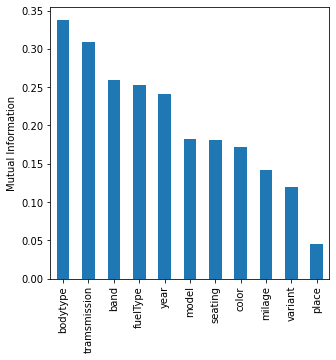

In [20]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(5, 5))
plt.ylabel('Mutual Information')

## import data untuk test

In [21]:
url_test = 'https://raw.githubusercontent.com/ramadhanbay/kuliah/main/dataset/cars_test_new.csv'
data_test = pd.read_csv(url_test, low_memory=False)
data_test.head(5)

,id,title,band,model,variant,fuelType,bodytype,tramsmission,seating,year,milage,color,image,place,price
0,42431,2014 BMW 320i 2.0 Sport Sedan,BMW,320i,Sport,Pertamax,Sedan,Automatic,5,2014,32500,Putih,https://img3.icarcdn.com/0782846/thumb-l_used-...,Tangerang,365000000
1,24089,2015 Mitsubishi Pajero Sport 2.5 Exceed SUV,Mitsubishi,Pajero Sport,Exceed,Solar,SUV,Automatic,7,2015,41000,Putih,https://img2.icarcdn.com/3144016/thumb-l_used-...,Gresik,305000000
2,33485,2016 Daihatsu Gran Max 1.3 D Van,Daihatsu,Gran Max,D,Pertamax,Van,Manual,8,2016,58000,Silver,https://img1.icarcdn.com/7813926/thumb-l_used-...,Blitar,102500000
3,38431,2012 Honda CR-V 2.4 2.4 SUV,Honda,CR-V,2.4,Pertamax,SUV,Automatic,5,2012,80000,Silver,https://img3.icarcdn.com/5514556/thumb-l_used-...,Jakarta Pusat,148000000
4,75566,2016 Toyota Fortuner 2.4 VRZ SUV,Toyota,Fortuner,VRZ,Solar,SUV,Automatic,7,2016,52000,Putih,https://img4.icarcdn.com/9025945/thumb-l_used-...,Bekasi,410000000


In [25]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
data_test = data_test.drop(['id','title','image'], axis=1)
print('The shape of our features is:', data_test.shape)

The shape of our features is: (4000, 12)


In [27]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   band          4000 non-null   object
 1   model         4000 non-null   object
 2   variant       3914 non-null   object
 3   fuelType      4000 non-null   object
 4   bodytype      3990 non-null   object
 5   tramsmission  4000 non-null   object
 6   seating       4000 non-null   object
 7   year          4000 non-null   int64 
 8   milage        4000 non-null   int64 
 9   color         4000 non-null   object
 10  place         4000 non-null   object
 11  price         4000 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 375.1+ KB


In [28]:
data_test.isnull().sum()

band             0
model            0
variant         86
fuelType         0
bodytype        10
tramsmission     0
seating          0
year             0
milage           0
color            0
place            0
price            0
dtype: int64